In [172]:
from scipy.io import netcdf

file2read_2015 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2015.nc','r')
file2read_2016 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2016.nc','r')
file2read_2017 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2017.nc','r')
file2read_2018 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2018.nc','r')
file2read_2019 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2019.nc','r')

temp_2015 = file2read_2015.variables["dis24"]
temp_2016 = file2read_2016.variables["dis24"]
temp_2017 = file2read_2017.variables["dis24"]
temp_2018 = file2read_2018.variables["dis24"]
temp_2019 = file2read_2019.variables["dis24"]

#missing values are encoded as 1e20

/tmp/ipykernel_88110/1560087656.py:3: DeprecationWarning: Please use `NetCDFFile` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  file2read_2015 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2015.nc','r')
/home/paul/.local/lib/python3.10/site-packages/scipy/io/_netcdf.py:305: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  warnings.warn((
/tmp/ipykernel_88110/1560087656.py:4: DeprecationWarning: Please use `NetCDFFile` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  file2read_2016 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2016.nc','r')
/tmp/ipykernel_88110/1560087656.py:5: DeprecationWarning: Please use `NetCDFFile` from the `sc

In [104]:
import pandas as pd
raw_df = pd.read_csv('../clean_data/concatenated_data.csv')

## Sarah, why is it not rounding the values in the label to two digits?

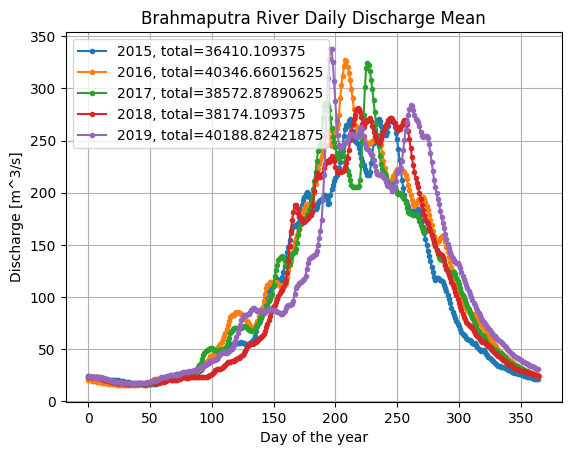

In [173]:
import matplotlib.pyplot as plt

lon_to_plot = 25
lat_to_plot = 100

mean_2015 = np.nanmean(data_2015, axis=(1,2))
mean_2016 = np.nanmean(data_2016, axis=(1,2))
mean_2017 = np.nanmean(data_2017, axis=(1,2))
mean_2018 = np.nanmean(data_2018, axis=(1,2))
mean_2019 = np.nanmean(data_2019, axis=(1,2))

total_discharge_2015 = np.round(np.sum(np.nanmean(data_2015, axis=(1,2))), 2)
total_discharge_2016 = np.sum(np.nanmean(data_2016, axis=(1,2)))
total_discharge_2017 = np.sum(np.nanmean(data_2017, axis=(1,2)))
total_discharge_2018 = np.sum(np.nanmean(data_2018, axis=(1,2)))
total_discharge_2019 = np.sum(np.nanmean(data_2019, axis=(1,2)))

plt.plot(mean_2015,".-", label=f'2015, total={float(total_discharge_2015):2f}')
plt.plot(mean_2016,".-", label=f'2016, total={total_discharge_2016.round(2)}')
plt.plot(mean_2017,".-", label=f'2017, total={total_discharge_2017}')
plt.plot(mean_2018,".-", label=f'2018, total={total_discharge_2018}')
plt.plot(mean_2019,".-", label=f'2019, total={total_discharge_2019}')

plt.xlabel('Day of the year')
plt.ylabel('Discharge [m^3/s]')
plt.title(f'Brahmaputra River Daily Discharge Mean')
plt.legend()
plt.grid()
plt.show()

## Estimate transition matrix for 2015

In [174]:
data_2015_flat = data_2015.reshape(data_2015.shape[0], data_2015.shape[1]*data_2015.shape[2])
data_2016_flat = data_2016.reshape(data_2016.shape[0], data_2016.shape[1]*data_2016.shape[2])
data_2017_flat = data_2017.reshape(data_2017.shape[0], data_2017.shape[1]*data_2017.shape[2])
data_2018_flat = data_2018.reshape(data_2018.shape[0], data_2018.shape[1]*data_2018.shape[2])
data_2019_flat = data_2019.reshape(data_2019.shape[0], data_2019.shape[1]*data_2019.shape[2])

In [175]:
data_2015_flat = data_2015_flat[:, ~np.isnan(data_2015_flat).any(axis=0)]
data_2016_flat = data_2016_flat[:, ~np.isnan(data_2016_flat).any(axis=0)]
data_2017_flat = data_2017_flat[:, ~np.isnan(data_2017_flat).any(axis=0)]
data_2018_flat = data_2018_flat[:, ~np.isnan(data_2018_flat).any(axis=0)]
data_2019_flat = data_2019_flat[:, ~np.isnan(data_2019_flat).any(axis=0)]

In [176]:
from sklearn.linear_model import LinearRegression


n_locations = 250
months = 12

def make_data(month, loc_indices):

    X = data_2015_flat[int(month*30):int((month+1)*30),:loc_indices]
    X = np.concatenate((X, data_2016_flat[int(month*30):int((month+1)*30),:loc_indices]))
    X = np.concatenate((X, data_2017_flat[int(month*30):int((month+1)*30),:loc_indices]))
    X = np.concatenate((X, data_2018_flat[int(month*30):int((month+1)*30),:loc_indices]))
    X = np.concatenate((X, data_2019_flat[int(month*30):int((month+1)*30),:loc_indices]))


    y = data_2015_flat[int(month*30):int((month+1)*30),1:loc_indices+1]
    y = np.concatenate((y, data_2016_flat[int(month)*30:int((month+1)*30),1:loc_indices+1]))
    y = np.concatenate((y, data_2017_flat[int(month)*30:int((month+1)*30),1:loc_indices+1]))
    y = np.concatenate((y, data_2018_flat[int(month)*30:int((month+1)*30),1:loc_indices+1]))
    y = np.concatenate((y, data_2019_flat[int(month)*30:int((month+1)*30),1:loc_indices+1]))


    return X, y


X_january, y_january = make_data(0, n_locations)
X_august, y_august = make_data(7, n_locations)

train_size = 0.7

X_january_train = X_january[:int(train_size*X_january.shape[0]),:]
X_january_test = X_january[int(train_size*X_january.shape[0]):,:]

y_january_train = y_january[:int(train_size*y_january.shape[0]),:]
y_january_test = y_january[int(train_size*y_january.shape[0]):,:]

X_august_train = X_august[:int(train_size*X_august.shape[0]),:]
X_august_test = X_august[int(train_size*X_august.shape[0]):,:]

y_august_train = y_august[:int(train_size*y_august.shape[0]),:]
y_august_test = y_august[int(train_size*y_august.shape[0]):,:]

reg_january = LinearRegression().fit(X_january_train, y_january_train)
reg_august = LinearRegression().fit(X_august_train, y_august_train)

## Linear Regression on Cleaned Data

In [177]:
# from sklearn.impute import SimpleImputer
# raw_df["time"] = pd.to_datetime(raw_df["time"])
# january_df = raw_df[raw_df["time"].dt.month == 1]
# january_df = january_df.dropna()
# august_df = raw_df[raw_df["time"].dt.month == 8]
# august_df = august_df.dropna()

# shifted_df_january = january_df.copy()
# shifted_df_january['dis24'] = january_df['dis24'].shift(1)
# shifted_df_august = august_df.copy()
# shifted_df_august['dis24'] = august_df['dis24'].shift(1)

# january_df = january_df.drop(january_df.index[0])
# august_df = august_df.drop(august_df.index[0])

# shifted_df_january = january_df.drop(january_df.index[-1])
# shifted_df_august = august_df.drop(august_df.index[-1])



# X_january = january_df.pivot_table(index='time', columns=['lon', 'lat'], values='dis24').to_numpy()
# X_august = august_df.pivot_table(index='time', columns=['lon', 'lat'], values='dis24').to_numpy()

# y_january = shifted_df_january.pivot_table(index='time', columns=['lon', 'lat'], values='dis24').to_numpy()
# y_august = shifted_df_august.pivot_table(index='time', columns=['lon', 'lat'], values='dis24').to_numpy()


# imputer = SimpleImputer(strategy='mean')
# X_january_imputed = imputer.fit_transform(X_january)
# X_august_imputed = imputer.fit_transform(X_august)

# y_january_imputed = imputer.fit_transform(y_january)
# y_august_imputed = imputer.fit_transform(y_august)

# X_january_test = X_january_imputed[int(train_size*X_january_imputed.shape[0]):,:]
# X_january_train = X_january_imputed[:int(train_size*X_january_imputed.shape[0]),:]

# y_january_test = y_january_imputed[int(train_size*y_january_imputed.shape[0]):,:]
# y_january_train = y_january_imputed[:int(train_size*y_january_imputed.shape[0]),:]

# X_august_test = X_august_imputed[int(train_size*X_august_imputed.shape[0]):,:]
# X_august_train = X_august_imputed[:int(train_size*X_august_imputed.shape[0]),:]

# y_august_test = y_august_imputed[int(train_size*y_august_imputed.shape[0]):,:]
# y_august_train = y_august_imputed[:int(train_size*y_august_imputed.shape[0]),:]

# reg_january = LinearRegression().fit(X_january_train, y_january_train)
# reg_august = LinearRegression().fit(X_august_train, y_august_train)

In [178]:
y_hat_january = reg_january.predict(X_january_test)
y_hat_august = reg_august.predict(X_august_test)

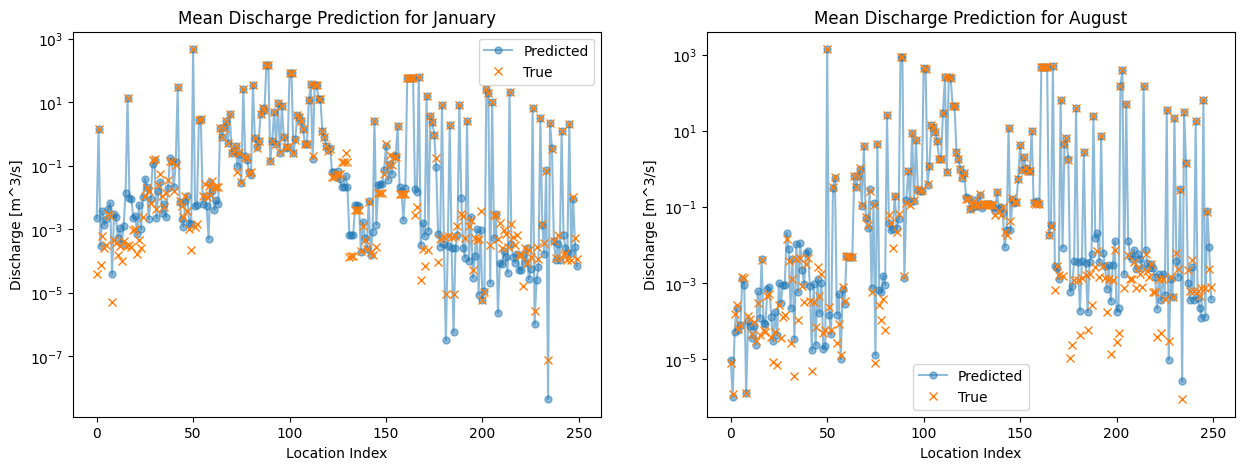

In [179]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].semilogy(np.abs(np.mean(y_hat_january, axis=0)), ".-", label='Predicted', markersize=10, alpha=0.5)
axs[0].semilogy(np.mean(y_january_test, axis=0), "x", label='True')
axs[0].set_xlabel('Location Index')
axs[0].set_ylabel('Discharge [m^3/s]')
axs[0].set_title('Mean Discharge Prediction for January')
axs[0].legend()

axs[1].semilogy(np.abs(np.mean(y_hat_august, axis=0)), ".-", label='Predicted', markersize=10, alpha=0.5)
axs[1].semilogy(np.mean(y_august_test, axis=0), "x", label='True')
axs[1].set_xlabel('Location Index')
axs[1].set_ylabel('Discharge [m^3/s]')
axs[1].set_title('Mean Discharge Prediction for August')
axs[1].legend()

plt.show()

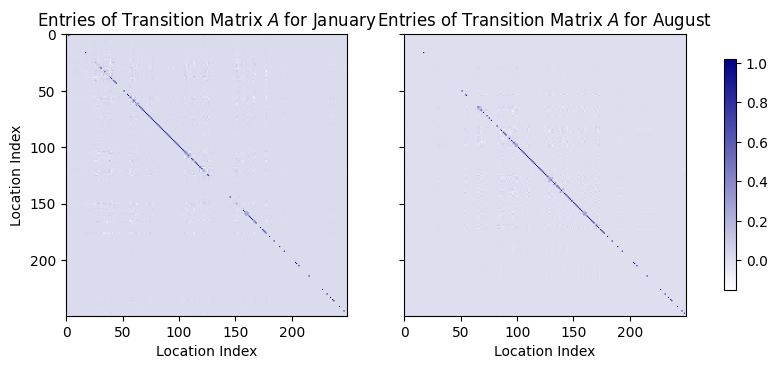

In [180]:
from matplotlib.colors import LinearSegmentedColormap

cmap0 = LinearSegmentedColormap.from_list('', ['white', 'darkblue'])

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axs[0].imshow(reg_january.coef_, cmap=cmap0)
axs[0].set_title('Entries of Transition Matrix $A$ for January')
axs[0].set_xlabel('Location Index')
axs[0].set_ylabel('Location Index')

im = axs[1].imshow(reg_august.coef_, cmap=cmap0)
axs[1].set_title('Entries of Transition Matrix $A$ for August')
axs[1].set_xlabel('Location Index')

fig.colorbar(im, ax=axs.ravel().tolist(), location="right", shrink=0.6)

# fig.tight_layout()
plt.show()

In [181]:
e_values_january = np.linalg.eig(reg_january.coef_)[0]
e_values_august = np.linalg.eig(reg_august.coef_)[0]

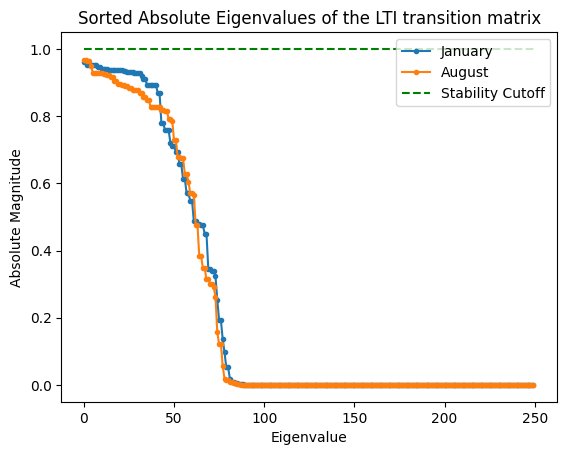

In [182]:
plt.plot(np.sort(np.abs(e_values_january))[::-1], '.-', label="January")
plt.plot(np.sort(np.abs(e_values_august))[::-1], '.-', label="August")
plt.hlines(1, 0, len(e_values_august), colors='g', linestyles='dashed', label='Stability Cutoff')
plt.xlabel('Eigenvalue')
plt.ylabel('Absolute Magnitude')
plt.title('Sorted Absolute Eigenvalues of the LTI transition matrix')
plt.legend(loc="best")

Sanity check: there is structure here as there are less Eigenvalues non-zero than there are entries in the matrix.

Check how system developes over time.

In [82]:
discharge_init_january = X_january[0,:]
discharge_init_august = X_august[0,:]

predicted_discharges_january = np.zeros((30, n_locations))
predicted_discharges_august = np.zeros((30, n_locations))

predicted_discharges_january[0,:] = discharge_init_january
predicted_discharges_august[0,:] = discharge_init_january

for i in range(1, 30):
    predicted_discharges_january[i,:] = reg_january.predict(predicted_discharges_january[i-1,:].reshape(1,-1))
    predicted_discharges_august[i,:] = reg_august.predict(predicted_discharges_august[i-1,:].reshape(1,-1))

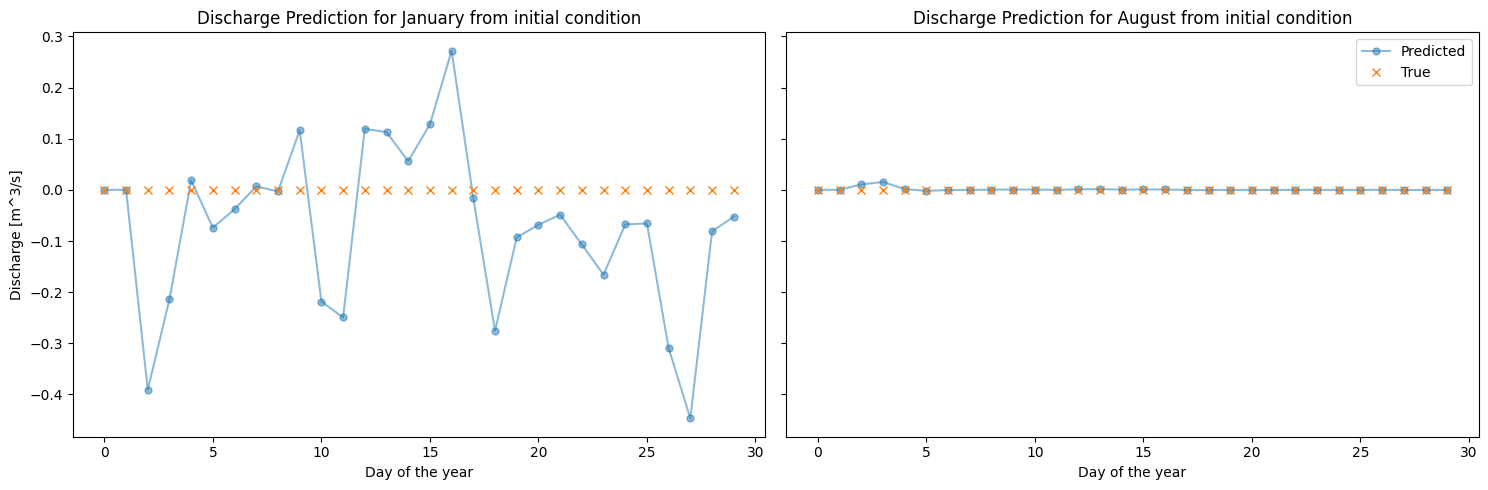

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

axs[0].plot(predicted_discharges_january[:,0], '.-', label='Predicted, ', markersize=10, alpha=0.5)
axs[0].plot(y_january[:30,0], 'x', label='True')
axs[0].set_xlabel('Day of the year')
axs[0].set_ylabel('Discharge [m^3/s]')
axs[0].set_title('Discharge Prediction for January from initial condition')

axs[1].plot(predicted_discharges_august[:,0], '.-', label='Predicted', markersize=10, alpha=0.5)
axs[1].plot(y_august[:30,0], 'x', label='True')
axs[1].set_xlabel('Day of the year')
axs[1].set_title('Discharge Prediction for August from initial condition')

plt.tight_layout()
plt.legend()
plt.show()

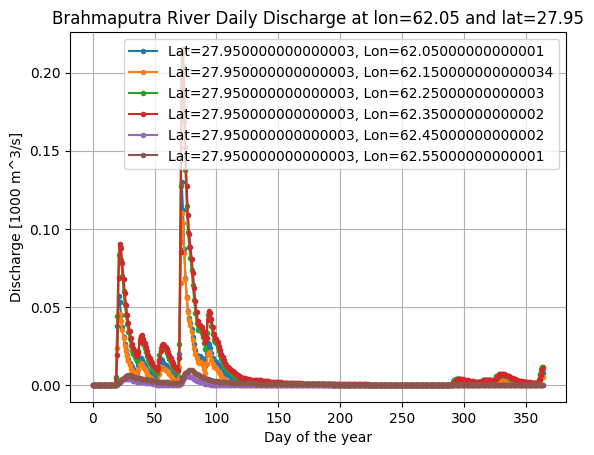

In [58]:
lat_to_plot = 100
lon_to_plot = 20

plt.plot(data_2015[:,lat_to_plot,lon_to_plot],".-", label=f'Lat={lat_values[lat_to_plot]}, Lon={lon_values[lon_to_plot]}')
plt.plot(data_2015[:,lat_to_plot,lon_to_plot+1],".-", label=f'Lat={lat_values[lat_to_plot]}, Lon={lon_values[lon_to_plot+1]}')
plt.plot(data_2015[:,lat_to_plot,lon_to_plot+2],".-", label=f'Lat={lat_values[lat_to_plot]}, Lon={lon_values[lon_to_plot+2]}')
plt.plot(data_2015[:,lat_to_plot,lon_to_plot+3],".-", label=f'Lat={lat_values[lat_to_plot]}, Lon={lon_values[lon_to_plot+3]}')
plt.plot(data_2015[:,lat_to_plot,lon_to_plot+4],".-", label=f'Lat={lat_values[lat_to_plot]}, Lon={lon_values[lon_to_plot+4]}')
plt.plot(data_2015[:,lat_to_plot,lon_to_plot+5],".-", label=f'Lat={lat_values[lat_to_plot]}, Lon={lon_values[lon_to_plot+5]}')
# plt.plot(data_2015[:,lat_to_plot,lon_to_plot+s20],".-", label=f'Lat={lat_values[lat_to_plot]}, Lon={lon_values[lon_to_plot+4]}')
# plt.plot(data_2016[:,lat_to_plot,lon_to_plot],".-", label='2016')
# plt.plot(data_2017[:,lat_to_plot,lon_to_plot],".-", label='2017')
# plt.plot(data_2018[:,lat_to_plot,lon_to_plot],".-", label='2018')
# plt.plot(data_2019[:,lat_to_plot,lon_to_plot],".-", label='2019')
plt.xlabel('Day of the year')
plt.ylabel('Discharge [1000 m^3/s]')
plt.title(f'Brahmaputra River Daily Discharge at lon={round(lon_values[lon_to_plot],2)} and lat={round(lat_values[lat_to_plot],2)}')
plt.legend()
plt.grid()
plt.show()